In [166]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import viz # curriculum viz example code

import env

np.random.seed(123)

In [114]:
def clean_percent(p):
    return print(f'{(p*100):.2f}%')

> Examples:

<div class="alert alert-block alert-info">
    
<b>Tip:</b> Lookup on YouTube!

</div>

### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

<div class="alert alert-block alert-info">
    
<b>Class Answer</b>

</div>

<div class="alert alert-block alert-info">
    
<b>My Answer</b>

</div>

In [171]:
mean = 2

x = np.arange(0,12)
y = stats.poisson(mean).pmf(x)

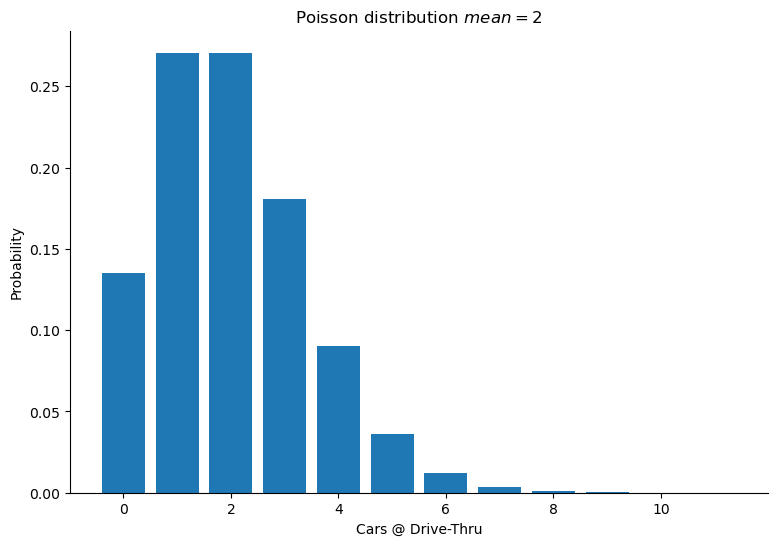

In [172]:
plt.bar(x,y)
plt.title('Poisson distribution $mean = 2$')
plt.xlabel('Cars @ Drive-Thru')
plt.ylabel('Probability');

- #### What is the probability that no cars drive up in the noon hour?

In [173]:
prob_cars = stats.poisson(mean)
prob_cars.pmf(0)

0.1353352832366127

- #### What is the probability that 3 or more cars come through the drive through?

In [175]:
prob_cars.sf(2)

0.32332358381693654

- #### How likely is it that the drive through gets at least 1 car?

In [71]:
prob_cars.sf(0)

0.8646647167633873

> #### The quarterly results look great!
>
> - Revenue was off the chart.
>> Test
> - Profits were higher than ever.
>
>  *Everything* is going according to **plan**.

---

### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [194]:
grades = stats.norm(3, .3)

- #### What grade point average is required to be in the top 5% of the graduating class?

<div class="alert alert-block alert-info">
    
<b>Class Answer</b>

</div>

In [178]:
μ = 3.0
σ = 0.3

In [179]:
grade = stats.norm(μ,σ)

In [182]:
grade.isf(.05)

3.4934560880854417

In [ ]:
# ???? FIND ANSWER
1-grade.xxx()

<div class="alert alert-block alert-info">
    
<b>My Answer</b>

</div>

In [196]:
grades.ppf(.95)

3.4934560880854417

- #### What GPA constitutes the bottom 15% of the class?


In [198]:
grades.ppf(.15)

2.689069983151863

- #### An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

1st decile: 0-10 percentile  
2nd decile: 10-20 percentile   
3rd decile: 20-30 percentile

<div class="alert alert-block alert-info">
    
<b>Class Answer</b>

</div>

In [185]:
range_of_gpas = grade.ppf([.2,.3])
range_of_gpas

array([2.74751363, 2.84267985])

In [200]:
1-grades.sf(2.8)

0.2524925375469227

<div class="alert alert-block alert-info">
    
<b>My Answer</b>

</div>

In [190]:
grades.cdf(2.8)

0.2524925375469227

In [ ]:
# YES

- #### If I have a GPA of 3.5, what percentile am I in?

In [201]:
grades.cdf(3.5)

0.9522096477271853

In [ ]:
# 95TH

### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [15]:
visitors = 4326
rate = 0.02
clickthroughs = 97

website_clicks = stats.binom(visitors, rate)

In [ ]:
# Survival Function
# Exclusive
# 96 to include 97

In [27]:
probability = website_clicks.sf(clickthroughs-1)

In [202]:
probability

0.13975823631416448

In [17]:
test = 1-rate

In [18]:
test

0.98

In [19]:
n_sims = 10_000

In [ ]:
# 1 = Yes Click  0 = No Click

In [23]:
clicks = np.random.choice([1,0], size=(n_sims, visitors), p=(rate,1-rate))

In [ ]:
# 4326 visitors probability: they click = 2% ; they don't click = 98%  X  10,000 simulations

In [24]:
print(clicks)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
(clicks.sum(axis=1) >= 97).mean()

0.1397

> Using Poisson Distribution to solve answer

In [203]:
p = .02
n_trials = 4326
λ = n_trials * p

In [204]:
# Survival Function
# Exclusive
# 96 to include 97

stats.poisson(λ).sf(96)

0.14211867659283192

### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

- #### What is the probability that at least one of your first 60 answers is correct?

<div class="alert alert-block alert-info">
    
<b>Class Answer</b>

</div>

In [206]:
n_trials = 60
p=0.01

stats.binom(n_trials,p).sf(0)

0.45284335760923855

<div class="alert alert-block alert-info">
    
<b>My Answer</b>

</div>

In [208]:
n = 60
p = 0.01

In [ ]:
# Survival Function: Exclusive, Greater Than

In [209]:
test_guess = stats.binom(n, p).sf(0)

In [210]:
print(test_guess)

0.45284335760923855


In [211]:
print(f'{(test_guess * 100):.2f}% chance of choosing 1 correct answer 1st 60 questions')

45.28% chance of choosing 1 correct answer 1st 60 questions


### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [73]:
breakroom_visitors = round(.9 * 22 * 3)

In [74]:
print(breakroom_visitors)

59


In [75]:
p = .03

In [76]:
tidy_student = stats.binom(breakroom_visitors, p)

In [78]:
probability_clean_breakroom_every_day=tidy_student.sf(0)

In [ ]:
# How likely is it that the break area gets cleaned up each day?

In [84]:
print(f'{(probability_clean_breakroom_every_day*100):.2f}%')

83.42%


In [ ]:
# How likely is it that it goes two days without getting cleaned up?

In [ ]:
# PMF

In [85]:
probability_clean_breakroom_2_days = stats.binom(n*2, p).pmf(0)

In [112]:
clean_percent(probability_clean_breakroom_2_days)

2.59%


In [ ]:
# All week?

In [97]:
probability_clean_breakroom_5_days = stats.binom(n*5, p).pmf(0)

In [113]:
clean_percent(probability_clean_breakroom_5_days)

0.01%


Text(0.5, 1.0, 'Clean Breakroom Per Day')

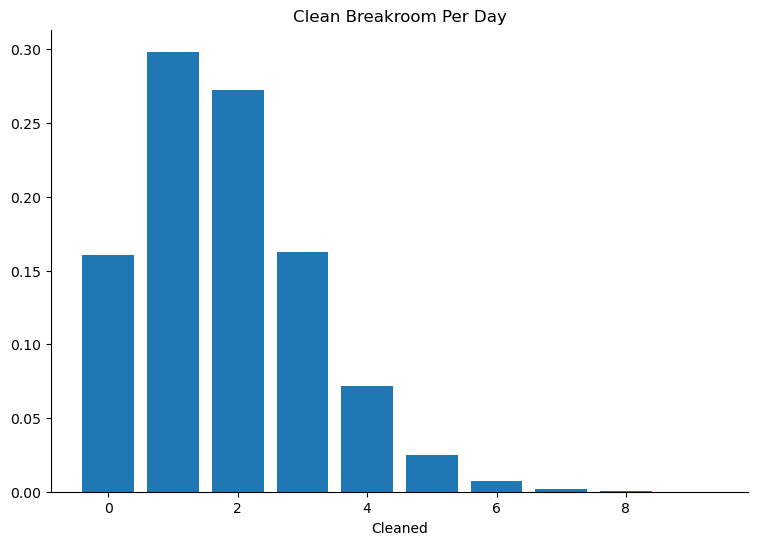

In [105]:
x = np.arange(0,10)
y = stats.binom(n, p).pmf(x)
plt.bar(x,y)
plt.xlabel('Cleaned')
plt.title('Clean Breakroom Per Day')

<div class="alert alert-block alert-info">
    
<b>Class Answer</b>

</div>

In [223]:
codeup = round(.9*22*3)
cleaned_p=.03

In [224]:
cleaned = stats.binom(codeup, cleaned_p).sf(0)

In [225]:
cleaned

0.8342199288437352

> ### 2 Days

In [226]:
two_days = stats.binom(codeup*2, p).pmf(0)

In [227]:
two_days

0.027483031992576134

### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [ ]:
# Normal, mean = 15, std = 3

In [139]:
mean = 15
std_dev = 3

In [128]:
lunch_line_people = stats.norm(15,3)

In [ ]:
# Ordering = 2, Food = 10, eating = 15

In [121]:
max_time = 60-(2+10+15)

In [123]:
print(max_time)

33


In [ ]:
# Probability Less than or equal to 33 minutes
# 33min / 2min
# 16.5 people
#
# C D F
# Total Sum of probability { Less than or Equal to value}

In [133]:
max_people = max_time/2

In [135]:
lunch_line_people_probability = lunch_line_people.cdf(max_people)

In [229]:
clean_percent(lunch_line_people_probability)

69.15%


In [ ]:
#
# P D F
# Total Sum of probability { Less than or Equal to value}

In [230]:
stats.norm(mean, std_dev).pdf(33)

1.0620228369451424e-07

Text(0.5, 0, 'Wait time')

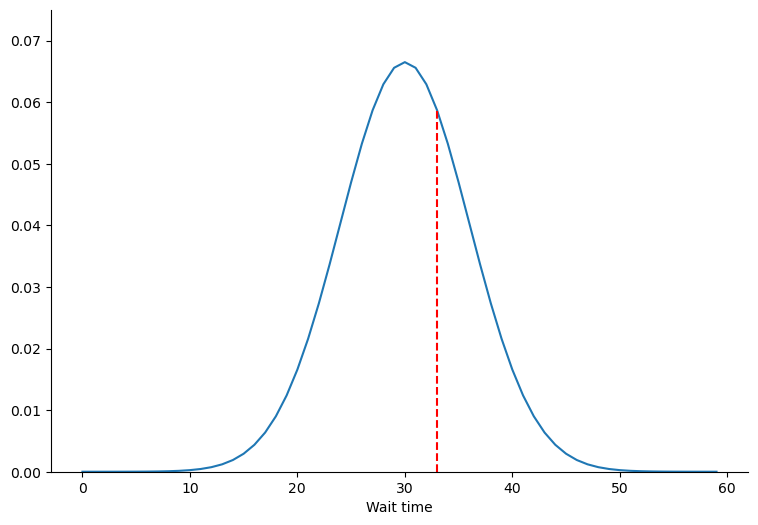

In [157]:
# Minutes Per Person

mean = 15 * 2
std_dev = 3 * 2

x = np.arange(0, 60, 1)
y = stats.norm(mean, std_dev).pdf(x)

plt.plot(x,y)
plt.vlines(33, 0 ,stats.norm(mean, std_dev).pdf(33),  ls = '--', color = 'r')
plt.ylim(0,.075)
plt.xlabel('Wait time')

### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [163]:
from env import username, password, host

In [167]:
def get_db_url(db):
    '''
    return a formatted string containing username, password
    host and database for connecting to the mySQL server and the
    database indicated.
    
    env_file checks to see if the env.py exists in cwd
    
    '''
    user, pass_, host_ = (username, password, host)
    
    return f"mysql+pymysql://{user}:{pass_}@{host_}/{db}"

In [235]:
# SQL SETUP VARIABLES
url_employees = get_db_url("employees")
query_employees = '''
SELECT
    *
FROM
    salaries
WHERE
    to_date > now()
'''

In [236]:
dataframe_employees = pd.read_sql(query_employees, url_employees)

In [237]:
dataframe_employees.head(3)

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01


> Using ```get_db_url()``` - function and creating ```query_employees_merged``` - SQL Query Variable 

```python
url_employees = get_db_url("employees")
query_employees_merged = '''
SELECT *
FROM employees
INNER JOIN dept_emp USING(emp_no)
INNER JOIN titles USING(emp_no)
INNER JOIN departments USING(dept_no)
;
'''
```

In [239]:
emp_mean = dataframe_employees['salary'].mean()
emp_std_dev = dataframe_employees['salary'].std()

- #### What percent of employees earn less than 60,000?

- #### What percent of employees earn more than 95,000?

- #### What percent of employees earn between 65,000 and 80,000?

- #### What do the top 5% of employees make?

Because it's a normal distribution.

In [240]:
quantile_salary = stats.norm.quantile(95)

AttributeError: 'norm_gen' object has no attribute 'quantile'

In [243]:
import quantumrandom as qtr

In [245]:
print(qtr.randint(0, 5))

3.1380941481651026


In [246]:
qtr.get_data(data_type='uint16', array_length=5)

[44626, 14476, 42933, 36132, 34492]

In [248]:
test_quantum_random_array = qtr.uint16()

array([11937, 25555, 38353, 55207, 26827, 64152, 54334, 33324, 15363,
       39163, 15294,  9613, 26584, 58548, 30943, 51759,  1979, 18204,
       20467, 58320, 63727, 52509, 62793, 50227, 43154, 51135, 57632,
       27855, 39471, 60095, 26144,  6468, 55175, 61206, 37270, 52208,
       28592, 43390, 49104, 18077, 14408, 15937, 25115,  2974, 61030,
       52097, 20204, 28472, 20202, 22534, 13765, 18811,  8198, 62832,
       52552, 52439, 33346, 26258, 55615, 29171, 38544, 34604, 45462,
       29053, 61541, 41678, 56606, 47871,  1874, 50376, 60988, 31229,
       47896, 40997,  3635,  9877, 58395, 29553, 48279, 12679, 53824,
       13962,  3114, 39761,  6994, 25179, 52478,  5923, 29017, 49852,
       27957, 28569, 46271, 43554, 12073, 17725, 44461, 63795, 12747,
       21685], dtype=uint16)

In [257]:
saved_quantum_random_array = (
[
11937, 25555, 38353, 55207, 26827, 64152, 54334, 33324, 15363, 39163,
15294, 89613, 26584, 58548, 30943, 51759, 71979, 18204, 20467, 58320, 
63727, 52509, 62793, 50227, 43154, 51135, 57632, 27855, 39471, 60095,
26144, 76468, 55175, 61206, 37270, 52208, 28592, 43390, 49104, 18077,
14408, 15937, 25115, 92974, 61030, 52097, 20204, 28472, 20202, 22534,
13765, 18811, 38198, 62832, 52552, 52439, 33346, 26258, 55615, 29171,
38544, 34604, 45462, 29053, 61541, 41678, 56606, 47871, 91874, 50376,
60988, 31229, 47896, 40997, 93635, 79877, 58395, 29553, 48279, 12679,
53824, 13962, 23114, 39761, 96994, 25179, 52478, 85923, 29017, 49852,
27957, 28569, 46271, 43554, 12073, 17725, 44461, 63795, 12747, 21685
])

In [258]:
len(saved_quantum_random_array)

100

<div class="alert alert-block alert-info">
    
<b>Hint</b> If you're looking at this exercise and wondering "How do I get pandas to talk the database, again?", remember that you'll need 3 things: your .gitignore, your env.py, and to use pd.read_sql. Copy over your .gitignore and env.py from your data science libraries exercises folder, and connect to the employees database like so:

</div>

``` python

import pandas as pd
import env

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
pd.read_sql('SELECT * FROM departments', url)

```